**Load Amazon reviews dataset**

The [dataset](https://www.kaggle.com/datasets/cynthiarempel/amazon-us-customer-reviews-dataset) contains reviews of products under Digital Software category from Amazon.com US marketplace.

In [22]:
import pandas as pd

df = pd.read_csv("/content/amazon_reviews_digital.tsv", sep="\t")

**View first five rows and last five rows of the dataset**

In [23]:
df.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,17747349,R2EI7QLPK4LF7U,B00U7LCE6A,106182406,CCleaner Free [Download],Digital_Software,4,0,0,N,Y,Four Stars,So far so good,2015-08-31
1,US,10956619,R1W5OMFK1Q3I3O,B00HRJMOM4,162269768,ResumeMaker Professional Deluxe 18,Digital_Software,3,0,0,N,Y,Three Stars,Needs a little more work.....,2015-08-31
2,US,13132245,RPZWSYWRP92GI,B00P31G9PQ,831433899,Amazon Drive Desktop [PC],Digital_Software,1,1,2,N,Y,One Star,Please cancel.,2015-08-31
3,US,35717248,R2WQWM04XHD9US,B00FGDEPDY,991059534,Norton Internet Security 1 User 3 Licenses,Digital_Software,5,0,0,N,Y,Works as Expected!,Works as Expected!,2015-08-31
4,US,17710652,R1WSPK2RA2PDEF,B00FZ0FK0U,574904556,SecureAnywhere Intermet Security Complete 5 De...,Digital_Software,4,1,2,N,Y,Great antivirus. Worthless customer support,I've had Webroot for a few years. It expired a...,2015-08-31


In [24]:
df.tail()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
101831,US,41754720,R19OFJV91M7D8X,B000YMR61A,141393130,TurboTax Deluxe Federal + State 2007,Digital_Software,2,12,13,N,N,"Easy to use, 1 comment 1 serious problem",I chose the deluxe version CD because of mortg...,2008-02-11
101832,US,51669529,R1I6G894K5AGG5,B000YMR61A,141393130,TurboTax Deluxe Federal + State 2007,Digital_Software,4,6,9,N,N,Schedule C IS for business- figures it would ...,"Schedule C IS for business, so figures it wou...",2008-02-08
101833,US,24731012,R17OE43FFEP81I,B000YMR5X4,234295632,TurboTax Premier Federal + State 2007,Digital_Software,2,9,16,N,N,Hassel to download,I wish that companies can test several scenari...,2008-02-05
101834,US,16049580,R15MGDDK63B52Z,B000YMR61A,141393130,TurboTax Deluxe Federal + State 2007,Digital_Software,3,14,14,N,N,beware of vista,i just installed turbotax deluxe 2007. If you ...,2008-02-05
101835,US,46098046,R1GGJJA2R68033,B000YMNI2Q,847631772,TurboTax Basic 2007,Digital_Software,1,54,60,N,N,don't waste your money,The description mentions that you can use this...,2008-01-26


**Number of rows and columns in dataframe**

In [25]:
print(df.shape)

(101836, 15)


**Columns of the dataset**

In [26]:
print(df.columns.to_list())

['marketplace', 'customer_id', 'review_id', 'product_id', 'product_parent', 'product_title', 'product_category', 'star_rating', 'helpful_votes', 'total_votes', 'vine', 'verified_purchase', 'review_headline', 'review_body', 'review_date']


**Select relevant columns from dataframe**

In [27]:
df = df[['review_body', 'star_rating']]

In [ ]:
df.head()

,review_body,star_rating
0,So far so good,4
1,Needs a little more work.....,3
2,Please cancel.,1
3,Works as Expected!,5
4,I've had Webroot for a few years. It expired a...,4


**Check for rows with null values**

In [28]:
null_rows = df.isnull().any(axis=1).sum()
print(null_rows)

5


**Add a column, sentiment to dataframe**

Fill the cells in sentiment column with 1 if rating is grater than 2, and 0 otherwise.

In [29]:
df['sentiment'] = df['star_rating'].apply(lambda x: 1 if x > 2 else 0)

In [30]:
df.head()

,review_body,star_rating,sentiment
0,So far so good,4,1
1,Needs a little more work.....,3,1
2,Please cancel.,1,0
3,Works as Expected!,5,1
4,I've had Webroot for a few years. It expired a...,4,1


**Drop rows with null values**

In [31]:
df.isnull().any(axis=1).sum()
df = df.dropna()
df

,review_body,star_rating,sentiment
0,So far so good,4,1
1,Needs a little more work.....,3,1
2,Please cancel.,1,0
3,Works as Expected!,5,1
4,I've had Webroot for a few years. It expired a...,4,1
...,...,...,...
101831,I chose the deluxe version CD because of mortg...,2,0
101832,"Schedule C IS for business, so figures it wou...",4,1
101833,I wish that companies can test several scenari...,2,0
101834,i just installed turbotax deluxe 2007. If you ...,3,1


**Distribution of ratings**

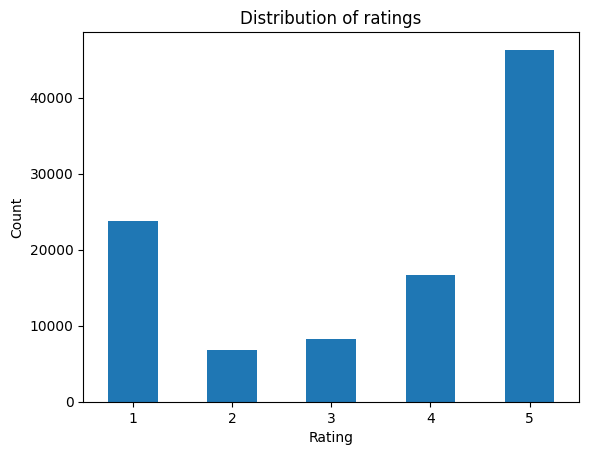

In [32]:
import matplotlib.pyplot as plt

ratings_count = df.star_rating.value_counts().sort_index()
ratings_count.plot(kind='bar', title='Distribution of ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

**Define input and output variables**

In [33]:
x = df["review_body"]
y = df['sentiment']

**Split the dataset into training and testing sets**

In [34]:
from sklearn.model_selection import train_test_split

x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=99)

**Tokenization of reviews text**

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,3))
x_train = vectorizer.fit_transform(x_train)
x_test = vectorizer.transform(x_test)

In [36]:
print(x_train.shape)
print(x_test.shape)

(71281, 5000)
(30550, 5000)


**Logistic Regression model**

Initialize Logistic regression model and trian the model with training set

In [37]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=500)
model.fit(x_train,y_train)

LogisticRegression(max_iter=500)

Evaluation of logistic regression model

In [48]:
from sklearn.metrics import accuracy_score,classification_report

y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)
print("accuracy:    ",accuracy)

report = classification_report(y_test,y_pred)
print(report)

accuracy:     0.8946972176759411
              precision    recall  f1-score   support

           0       0.85      0.79      0.82      9237
           1       0.91      0.94      0.93     21313

    accuracy                           0.89     30550
   macro avg       0.88      0.87      0.87     30550
weighted avg       0.89      0.89      0.89     30550



In [45]:
review = ["worst product i have bought ever"]
pred_sentiment = model.predict(vectorizer.transform(review))
print(pred_sentiment)

review2 = ["worth every penny"]
pred_sentiment = model.predict(vectorizer.transform(review2))
print(pred_sentiment)

[0]
[1]


**Naive Bayes model**

In [49]:
from sklearn.naive_bayes import BernoulliNB

nb_model = BernoulliNB()
nb_model.fit(x_train, y_train)

BernoulliNB()

Evaluate Naive Bayes model

In [53]:
y_pred_nb = nb_model.predict(x_test)
accuracy_nb = accuracy_score(y_test,y_pred_nb)
print("Naive Bayes accuracy:    ",accuracy_nb)

report = classification_report(y_test,y_pred_nb)
print(report)

Naive Bayes accuracy:     0.7613420621931261
              precision    recall  f1-score   support

           0       0.61      0.58      0.60      9237
           1       0.82      0.84      0.83     21313

    accuracy                           0.76     30550
   macro avg       0.72      0.71      0.71     30550
weighted avg       0.76      0.76      0.76     30550



In [62]:
review = ["worst product i have bought ever"]
pred_sentiment = nb_model.predict(vectorizer.transform(review))
print(pred_sentiment)

review2 = ["worth every penny"]
pred_sentiment = nb_model.predict(vectorizer.transform(review2))
print(pred_sentiment)

[1]
[1]


**Support Vector Machine model**

In [56]:
from sklearn.svm import LinearSVC

svm_model = LinearSVC(max_iter=1000)
svm_model.fit(x_train, y_train)

LinearSVC()

Evaluate Support Vector Machine model

In [61]:
y_pred_svm = svm_model.predict(x_test)
accuracy_svm = accuracy_score(y_test,y_pred_svm)
print("SVM model accuracy:    ",accuracy_svm, end="\n\n")
print("SVM model classification report: ", end="\n")
report = classification_report(y_test,y_pred_svm)
print(report)

SVM model accuracy:     0.8950245499181669

SVM model classification report: 
              precision    recall  f1-score   support

           0       0.84      0.81      0.82      9237
           1       0.92      0.93      0.93     21313

    accuracy                           0.90     30550
   macro avg       0.88      0.87      0.87     30550
weighted avg       0.89      0.90      0.89     30550



In [63]:
review = ["worst product i have bought ever"]
pred_sentiment = svm_model.predict(vectorizer.transform(review))
print(pred_sentiment)

review2 = ["worth every penny"]
pred_sentiment = svm_model.predict(vectorizer.transform(review2))
print(pred_sentiment)

[0]
[1]


**Random Forest model**

In [79]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=50,max_depth=50)
rf_model.fit(x_train, y_train)

RandomForestClassifier(max_depth=50, n_estimators=50)

Evaluate Random Forest model

In [80]:
y_pred_rf = rf_model.predict(x_test)
accuracy_rf = accuracy_score(y_test,y_pred_rf)
print("Random Forest model accuracy:    ",accuracy_rf, end="\n\n")
print("Random Forest model classification report: ", end="\n")
report = classification_report(y_test,y_pred_rf)
print(report)

Random Forest model accuracy:     0.8424549918166939

Random Forest model classification report: 
              precision    recall  f1-score   support

           0       0.84      0.60      0.70      9237
           1       0.84      0.95      0.89     21313

    accuracy                           0.84     30550
   macro avg       0.84      0.77      0.79     30550
weighted avg       0.84      0.84      0.83     30550



In [81]:
review = ["worst product i have bought ever"]
pred_sentiment = rf_model.predict(vectorizer.transform(review))
print(pred_sentiment)

review2 = ["worth every penny"]
pred_sentiment = rf_model.predict(vectorizer.transform(review2))
print(pred_sentiment)

[0]
[1]
